In [1]:
# Import Pandas, Numpy, Matplotlib, and Sqlite3
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import sqlite3
from seaborn import plt
from matplotlib.dates import date2num, num2date

# This enables inline Plots
%matplotlib inline

In [66]:
data_file = 'Medtrack_Deals-MA-Private_21Jan2015.csv'
#Add new column names, initial col names had spaces and slashes
df_cols = ['date', 'category', 'acquirer', 'target', 'value', 'headline']
df = pd.read_csv(data_file, sep=',', names = df_cols)
#Remove initial col names, anything w/o date or value
df = df[1:].dropna(subset=['date', 'value'])
#Replace commas in value and parse number
df['value'] = [float(v.replace(',','')) for v in df.value]
#Check only for values > 100M
df = df[df.value >= 100]
l = map(lambda x: x.split('/'),df.date)
year = map(lambda x: int(x[2]), l)
df['year'] = year
df.reset_index(drop=True, inplace=True)
df.head()

,date,category,acquirer,target,value,headline,year
0,1/16/2015,Majority Acquisition,"Roche Holding, Ltd.",Trophos SA,550.7,Roche to acquire Trophos,2015
1,1/13/2015,Exit,"Otsuka Pharmaceutical Co., Ltd.","AVANIR Pharmaceuticals, Inc.",1495.2,"Baker Brother, T. Rowe Price, and Fidelity Man...",2015
2,1/12/2015,Majority Acquisition,"Roche Holding, Ltd.","Foundation Medicine, Inc.",780.0,Roche Holding to acquire majority stake in Fou...,2015
3,1/11/2015,Majority Acquisition,"Biogen Idec, Inc.","Convergence Pharmaceuticals, Ltd.",675.0,Biogen Idec to acquire Convergence Pharmaceuti...,2015
4,1/7/2015,Majority Acquisition,BTG plc,"PneumRx, Inc.",475.0,BTG acquires PneumRx,2015


In [53]:
import re
import json
import urllib

s_name = urllib.quote(dname)
url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={name}&callback=YAHOO.Finance.SymbolSuggest.ssCallback'.format(name = s_name)
string = urllib.urlopen(url).read()
string = string.replace('YAHOO.Finance.SymbolSuggest.ssCallback(','')
string = string[:-1]
string

'{"ResultSet":{"Query":"avanir pharmaceuticals, inc.","Result":[{"symbol":"AVNR","name":"Avanir Pharmaceuticals, Inc.","exch":"NMS","type":"S","exchDisp":"NASDAQ","typeDisp":"Equity"}]}}'

In [54]:
data = json.loads(string)
result = data['ResultSet']['Result']
if len(result) == 0:
    symbol = ''
else:
    symbol = result[0]['symbol']
symbol

u'AVNR'

In [55]:
#function to search yahoo for symbol based on comp name, parse to json, then pull first symbol entry
def name_to_symbol(cname):
    s_name = urllib.quote(cname)
    url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={name}&callback=YAHOO.Finance.SymbolSuggest.ssCallback'.format(name = s_name)
    string = urllib.urlopen(url).read()
    string = string.replace('YAHOO.Finance.SymbolSuggest.ssCallback(','')
    string = string[:-1]
    data = json.loads(string)
    result = data['ResultSet']['Result']
    if len(result) == 0:
        symbol = ''
    else:
        symbol = result[0]['symbol']
    return symbol

In [57]:
symbol = []
for name in df.target:
    symbol.append(name_to_symbol(name))
symbol

['',
 u'AVNR',
 u'FMI',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 u'NBHGF',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 u'CFN',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 u'QCOR',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 u'FURX',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 u'ARTC',
 u'MCRPF',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 u'ALGZF',
 '',
 '',
 '',
 '',
 '',
 u'APFC',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 u'CHDX',
 '',
 u'LCAV',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 u'CLVS',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',

In [67]:
df['t_symbol'] = symbol
df.head()

,date,category,acquirer,target,value,headline,year,t_symbol
0,1/16/2015,Majority Acquisition,"Roche Holding, Ltd.",Trophos SA,550.7,Roche to acquire Trophos,2015,
1,1/13/2015,Exit,"Otsuka Pharmaceutical Co., Ltd.","AVANIR Pharmaceuticals, Inc.",1495.2,"Baker Brother, T. Rowe Price, and Fidelity Man...",2015,AVNR
2,1/12/2015,Majority Acquisition,"Roche Holding, Ltd.","Foundation Medicine, Inc.",780.0,Roche Holding to acquire majority stake in Fou...,2015,FMI
3,1/11/2015,Majority Acquisition,"Biogen Idec, Inc.","Convergence Pharmaceuticals, Ltd.",675.0,Biogen Idec to acquire Convergence Pharmaceuti...,2015,
4,1/7/2015,Majority Acquisition,BTG plc,"PneumRx, Inc.",475.0,BTG acquires PneumRx,2015,


In [59]:
def get_historical_prices(symbol, date):
    """
    Get historical prices for the given ticker symbol.
    First will need to split date on '/'
    
    Returns a json list.
    """
    m2, d2, y2 = date.split('/')
    m2 = str(int(m2) - 1)
    d1 = d2
    m1 = m2
    y1 = str(int(y2) - 1)
    
    url = 'http://ichart.yahoo.com/table.csv?s=%s&' % symbol + \
          'd=%s&' % m2 + \
          'e=%s&' % d2 + \
          'f=%s&' % y2 + \
          'g=d&' + \
          'a=%s&' % m1 + \
          'b=%s&' % d1 + \
          'c=%s&' % y1 + \
          'ignore=.csv'
    days = urllib.urlopen(url).readlines()
#     return days
    data = [day[:-2].split(',') for day in days]
    return data

In [61]:
start = []
end = []
for i in range(len(df)):
    if df.t_symbol[i] == '':
        start.append('')
        end.append('')
    else:
        data = get_historical_prices(df.t_symbol[i], df.date[i])
        if len(data[0]) == 1:
            start.append('')
            end.append('')
        else:
            start.append(float(data[-1][1]))
            end.append(float(data[1][1]))

In [68]:
df['t_start'] = start
df['t_end'] = end
df.head()

,date,category,acquirer,target,value,headline,year,t_symbol,t_start,t_end
0,1/16/2015,Majority Acquisition,"Roche Holding, Ltd.",Trophos SA,550.7,Roche to acquire Trophos,2015,,,
1,1/13/2015,Exit,"Otsuka Pharmaceutical Co., Ltd.","AVANIR Pharmaceuticals, Inc.",1495.2,"Baker Brother, T. Rowe Price, and Fidelity Man...",2015,AVNR,3.32,16.96
2,1/12/2015,Majority Acquisition,"Roche Holding, Ltd.","Foundation Medicine, Inc.",780.0,Roche Holding to acquire majority stake in Fou...,2015,FMI,24.28,54.19
3,1/11/2015,Majority Acquisition,"Biogen Idec, Inc.","Convergence Pharmaceuticals, Ltd.",675.0,Biogen Idec to acquire Convergence Pharmaceuti...,2015,,,
4,1/7/2015,Majority Acquisition,BTG plc,"PneumRx, Inc.",475.0,BTG acquires PneumRx,2015,,,


In [87]:
df

,date,category,acquirer,target,value,headline,year,t_symbol,t_start,t_end,t_dif
0,1/16/2015,Majority Acquisition,"Roche Holding, Ltd.",Trophos SA,550.7,Roche to acquire Trophos,2015,,,,
1,1/13/2015,Exit,"Otsuka Pharmaceutical Co., Ltd.","AVANIR Pharmaceuticals, Inc.",1495.2,"Baker Brother, T. Rowe Price, and Fidelity Man...",2015,AVNR,3.32,16.96,13.64
2,1/12/2015,Majority Acquisition,"Roche Holding, Ltd.","Foundation Medicine, Inc.",780.0,Roche Holding to acquire majority stake in Fou...,2015,FMI,24.28,54.19,29.91
3,1/11/2015,Majority Acquisition,"Biogen Idec, Inc.","Convergence Pharmaceuticals, Ltd.",675.0,Biogen Idec to acquire Convergence Pharmaceuti...,2015,,,,
4,1/7/2015,Majority Acquisition,BTG plc,"PneumRx, Inc.",475.0,BTG acquires PneumRx,2015,,,,
5,1/6/2015,Majority Acquisition,Cardio3 BioSciences SA,"OnCyte, LLC",203.0,Cardio3 Biosciences acquires OnCyte from Celda...,2015,,,,
6,1/2/2015,Asset Purchase,Virbac S.A,Eli Lilly and Company - US veterinary assets,410.0,Virbac acquires veterinary assets from Eli Lilly,2015,,,,
7,1/1/2015,Majority Acquisition,"Elanco India Pvt., Ltd.|Eli Lilly and Company","Novartis Animal Health, Inc.",5400.0,Eli Lilly and Company acquires Novartis Animal...,2015,,,,
8,12/18/2014,Majority Acquisition,"Merck &amp; Co., Inc. (formerly Schering-Ploug...",OncoEthix SA,375.0,Merck acquires OncoEthix,2014,,,,
9,12/18/2014,Majority Acquisition,"Roche Holding, Ltd.",Dutalys GmbH,488.8,Roche to acquire Dutalys,2014,,,,


In [100]:
#Count number of entries
#len(df[df.t_symbol != ''])
df[df.t_symbol != '']
#df[df['target'].str.contains(r"\(formerly|\|")]

,date,category,acquirer,target,value,headline,year,t_symbol,t_start,t_end,t_dif
1,1/13/2015,Exit,"Otsuka Pharmaceutical Co., Ltd.","AVANIR Pharmaceuticals, Inc.",1495.2,"Baker Brother, T. Rowe Price, and Fidelity Man...",2015,AVNR,3.32,16.96,13.64
2,1/12/2015,Majority Acquisition,"Roche Holding, Ltd.","Foundation Medicine, Inc.",780.0,Roche Holding to acquire majority stake in Fou...,2015,FMI,24.28,54.19,29.91
12,12/11/2014,Majority Acquisition,Danaher Corporation,Nobel Biocare Holding AG,2200.0,Danaher acquires Nobel Biocare,2014,NBHGF,16.96,17.57,0.61
37,10/5/2014,Majority Acquisition,"Becton, Dickinson and Company",CareFusion Corporation,12200.0,"Becton, Dickinson to acquire Carefusion",2014,CFN,37.26,45.66,8.4
56,8/14/2014,Majority Acquisition,"Mallinckrodt, Inc.","Questcor Pharmaceuticals, Inc.",5800.0,Mallinckrodt acquires Questcor Pharmaceuticals,2014,QCOR,69.07,92.18,23.11
76,7/2/2014,Majority Acquisition,"Forest Laboratories, Inc.","Furiex Pharmaceuticals, Inc.",1460.0,Forest Laboratories acquires Furiex Pharmaceut...,2014,FURX,36,104.77,68.77
87,5/29/2014,Majority Acquisition,Smith &amp; Nephew plc,ArthroCare Corporation,1700.0,Smith & Nephew acquires ArthroCare,2014,ARTC,33.85,48.6,14.75
88,5/12/2014,"DIRECT INVESTMENT,Minority Acquisition",GIC,MicroPort Scientific Corporation,100.0,MicroPort Scientific raises $100 million in pr...,2014,MCRPF,0.73,0.64,-0.09
104,3/21/2014,Majority Acquisition,Bayer AG,Algeta ASA,2882.2,Bayer acquires 98.2% stake in Algeta,2014,ALGZF,33.75,60.39,26.64
110,2/27/2014,"100% acquisition,Going Private","H.I.G. Capital, LLC",American Pacific Corporation,392.0,H.I.G. Capital acquires 100% of American Pacific,2014,APFC,20.07,46.5,26.43


In [69]:
dif = []
for i in range(len(df)):
    if df.t_start[i] == '':
        dif.append('')
    else:
       dif.append(df.t_end[i] - df.t_start[i])
df['t_dif'] = dif
df.head()

,date,category,acquirer,target,value,headline,year,t_symbol,t_start,t_end,t_dif
0,1/16/2015,Majority Acquisition,"Roche Holding, Ltd.",Trophos SA,550.7,Roche to acquire Trophos,2015,,,,
1,1/13/2015,Exit,"Otsuka Pharmaceutical Co., Ltd.","AVANIR Pharmaceuticals, Inc.",1495.2,"Baker Brother, T. Rowe Price, and Fidelity Man...",2015,AVNR,3.32,16.96,13.64
2,1/12/2015,Majority Acquisition,"Roche Holding, Ltd.","Foundation Medicine, Inc.",780.0,Roche Holding to acquire majority stake in Fou...,2015,FMI,24.28,54.19,29.91
3,1/11/2015,Majority Acquisition,"Biogen Idec, Inc.","Convergence Pharmaceuticals, Ltd.",675.0,Biogen Idec to acquire Convergence Pharmaceuti...,2015,,,,
4,1/7/2015,Majority Acquisition,BTG plc,"PneumRx, Inc.",475.0,BTG acquires PneumRx,2015,,,,


In [74]:
df_valid = df[df.t_dif != '']
tyeardif = df_valid[['year', 't_dif']].sort('year')

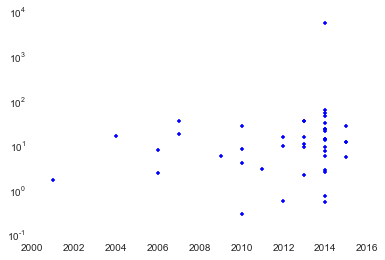

In [78]:
plt.plot(tyeardif.year, tyeardif.t_dif, 'b.')
plt.yscale('log')